# Netflix 데이터 분석


### 국가별 분포도

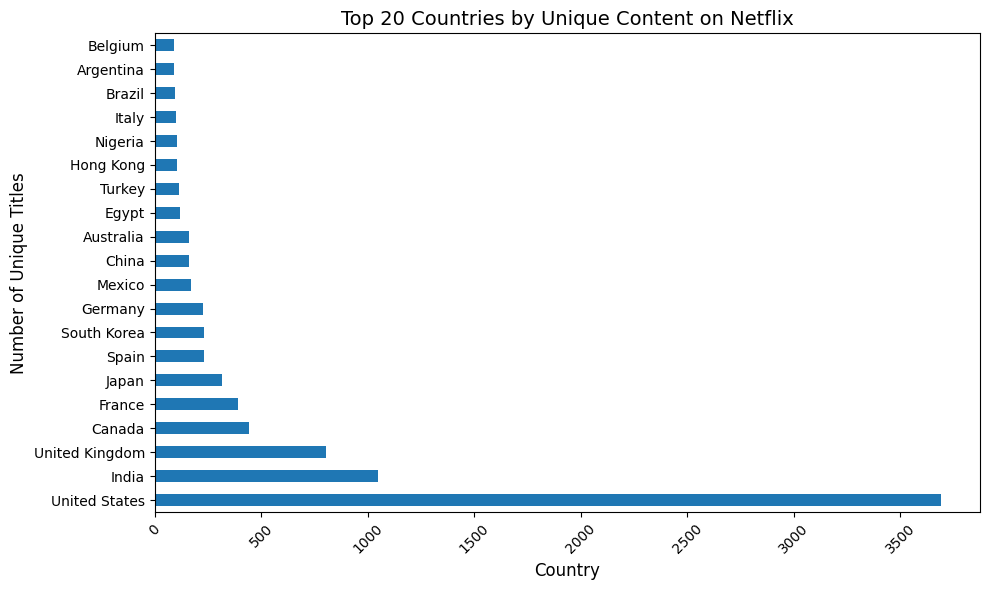

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

netflix_data = pd.read_csv('netflix_titles.csv') 

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

unique_country_counts = netflix_countries_split['country'].value_counts()

plt.figure(figsize=(10, 6))
unique_country_counts.head(20).plot(kind='barh')
plt.title('Top 20 Countries by Unique Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Unique Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

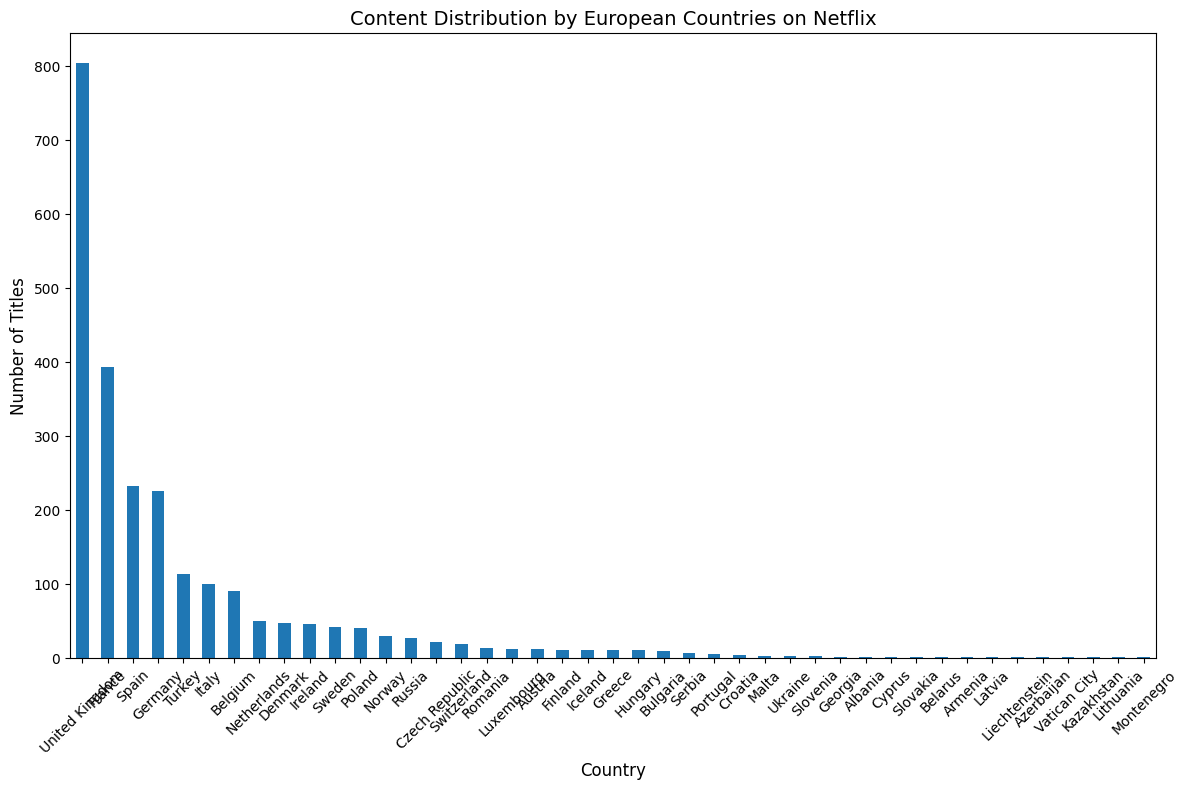

In [2]:
# 유럽분포
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
    "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]
european_content = netflix_countries_split[netflix_countries_split['country'].isin(european_countries)]

european_country_counts = european_content['country'].value_counts()

plt.figure(figsize=(12, 8))
european_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by European Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


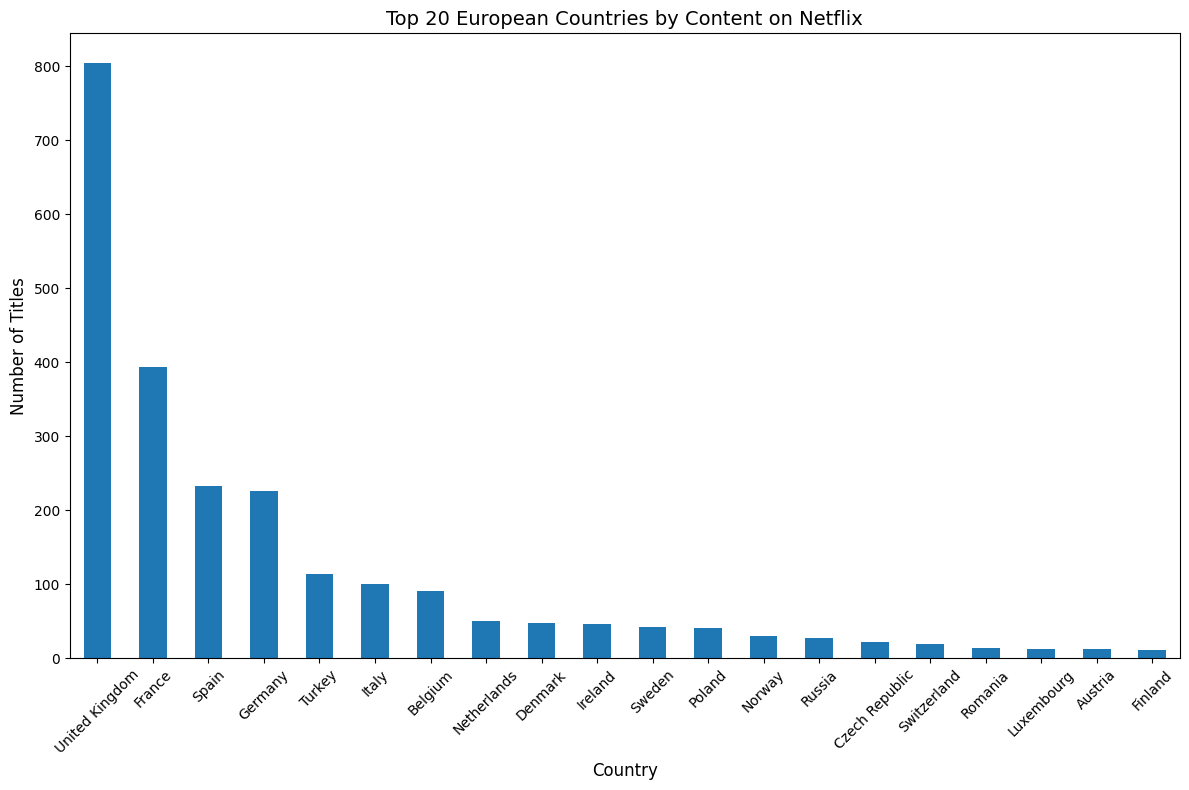

In [3]:
# Get top 20 European countries by content count
top_20_european_countries = european_country_counts.head(20)

# Plot top 20 European countries
plt.figure(figsize=(12, 8))
top_20_european_countries.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 European Countries by Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


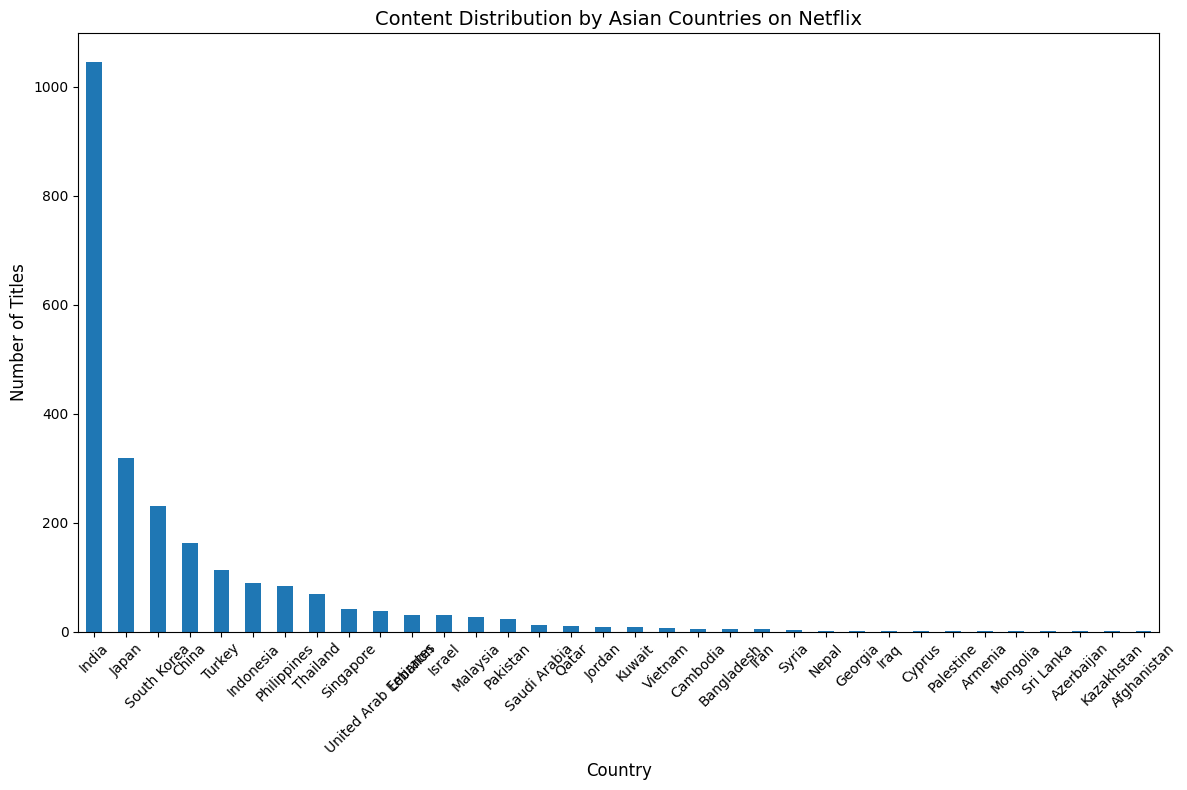

In [4]:
# 아시아
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", 
    "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", 
    "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
    "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", 
    "Yemen"
]

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

asian_content = netflix_countries_split[netflix_countries_split['country'].isin(asian_countries)]

asian_country_counts = asian_content['country'].value_counts()

plt.figure(figsize=(12, 8))
asian_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Asian Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


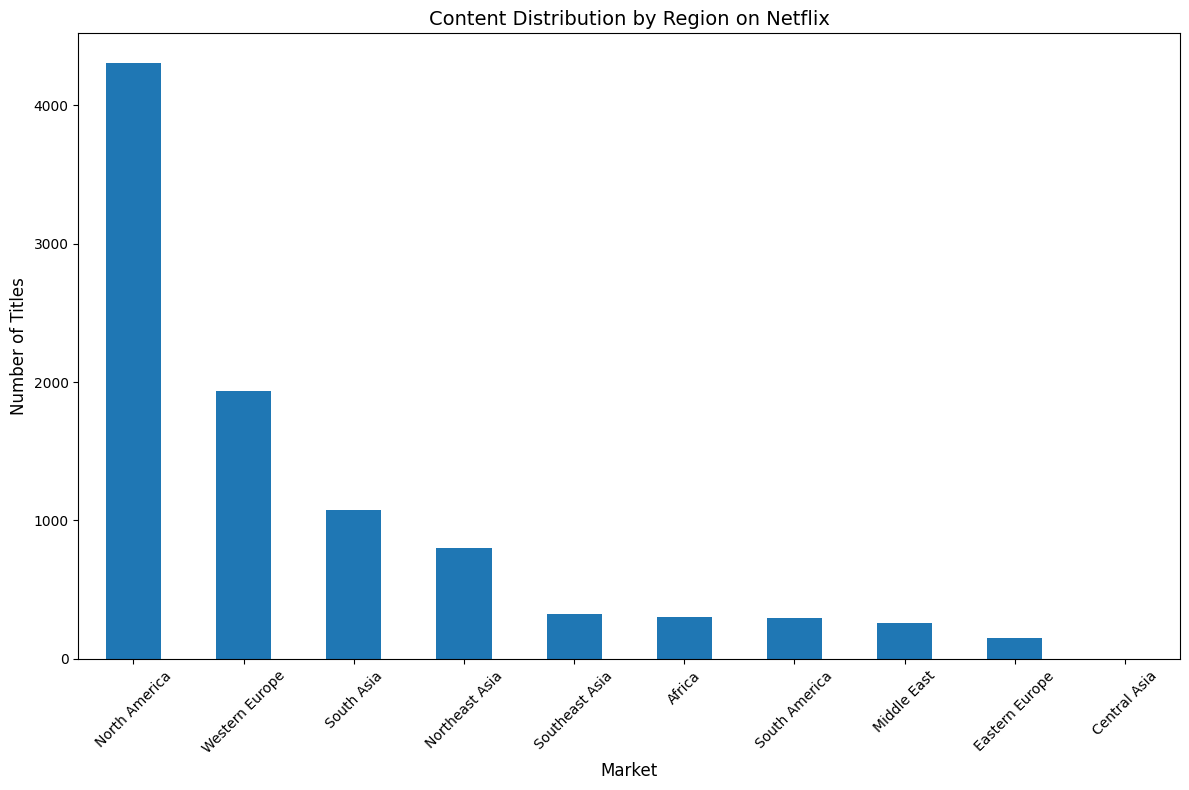

In [7]:
# 마켓별
region_mapping = {
    "Northeast Asia": ["China", "Japan", "South Korea", "Mongolia", "Taiwan"],
    "Southeast Asia": ["Vietnam", "Thailand", "Philippines", "Indonesia", "Malaysia", "Singapore", "Myanmar", "Cambodia", "Laos", "Brunei", "Timor-Leste"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal", "Maldives", "Bhutan"],
    "Middle East": ["Saudi Arabia", "Iran", "Iraq", "Israel", "Jordan", "Lebanon", "Syria", "Turkey", "Yemen", "United Arab Emirates", "Qatar", "Oman", "Bahrain", "Palestine", "Kuwait"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Uruguay", "Paraguay", "Bolivia", "Guyana", "Suriname"],
    "Western Europe": ["France", "Germany", "United Kingdom", "Italy", "Spain", "Netherlands", "Belgium", "Switzerland", "Austria", "Luxembourg", "Monaco", "Andorra"],
    "Eastern Europe": ["Russia", "Poland", "Ukraine", "Czech Republic", "Slovakia", "Hungary", "Romania", "Bulgaria", "Serbia", "Croatia", "Bosnia and Herzegovina", "Montenegro", "North Macedonia", "Slovenia", "Belarus", "Georgia", "Armenia", "Azerbaijan", "Moldova"],
    "Africa": ["South Africa", "Nigeria", "Egypt", "Kenya", "Ethiopia", "Ghana", "Morocco", "Algeria", "Tunisia", "Libya", "Sudan"],
    "Central Asia": ["Kazakhstan", "Uzbekistan", "Turkmenistan", "Kyrgyzstan", "Tajikistan"]
}

country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

netflix_countries_split['region'] = netflix_countries_split['country'].map(country_to_region)

region_counts = netflix_countries_split['region'].value_counts()
plt.figure(figsize=(12, 8))
region_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Region on Netflix', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


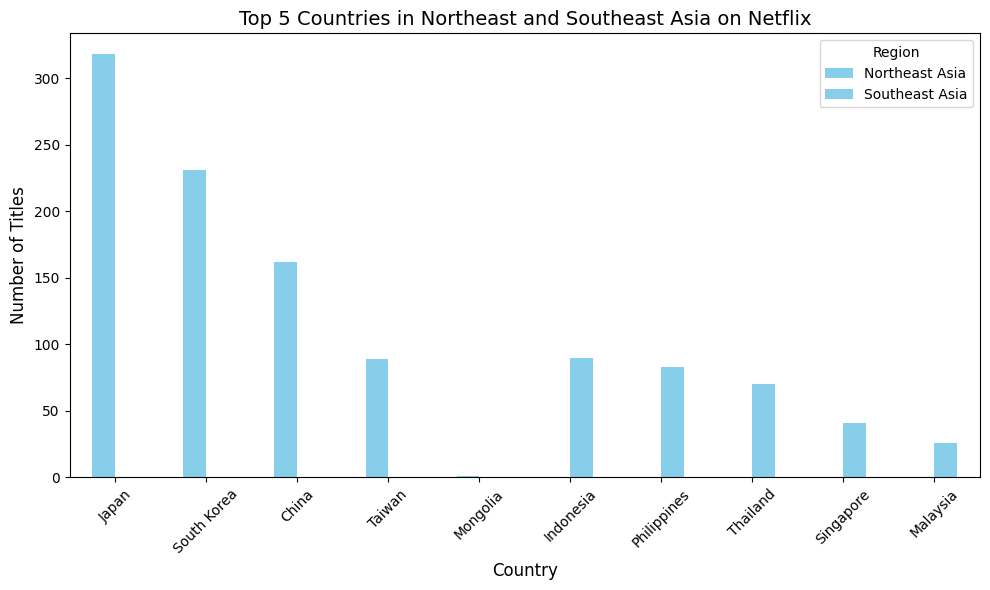

In [11]:
# Filter data for Northeast Asia and Southeast Asia
northeast_asia = region_mapping["Northeast Asia"]
southeast_asia = region_mapping["Southeast Asia"]

northeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(northeast_asia)]
southeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(southeast_asia)]

northeast_asia_counts = northeast_asia_data['country'].value_counts()
southeast_asia_counts = southeast_asia_data['country'].value_counts()

combined_top_5 = pd.concat([
    northeast_asia_counts.head(5).rename("Northeast Asia"),
    southeast_asia_counts.head(5).rename("Southeast Asia")
], axis=1)

combined_top_5.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Countries in Northeast and Southeast Asia on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right', labels=['Northeast Asia', 'Southeast Asia'])
plt.tight_layout()
plt.show()

